 # 查看Pipeline支持的任務類型

In [13]:
from transformers.pipelines import SUPPORTED_TASKS
for item in SUPPORTED_TASKS.keys():
  print(item)


audio-classification
automatic-speech-recognition
text-to-audio
feature-extraction
text-classification
token-classification
question-answering
table-question-answering
visual-question-answering
document-question-answering
fill-mask
summarization
translation
text2text-generation
text-generation
zero-shot-classification
zero-shot-image-classification
zero-shot-audio-classification
image-classification
image-feature-extraction
image-segmentation
image-to-text
object-detection
zero-shot-object-detection
depth-estimation
video-classification
mask-generation
image-to-image


In [10]:
# %%
for k, v in SUPPORTED_TASKS.items():
    print(k, v)


audio-classification {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
automatic-speech-recognition {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '22aad52')}}, 'type': 'multimodal'}
text-to-audio {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'default': {'model': {'pt': ('suno

 # Pipeline的創建與使用方式

In [1]:
# %%
from transformers import pipeline, QuestionAnsweringPipeline


 ## 根據任務類型直接創建Pipeline, 默認都是英文的模型

In [2]:
# %%
pipe = pipeline("text-classification")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [3]:
# %%
pipe(["very good!", "vary bad!"])


[{'label': 'POSITIVE', 'score': 0.9998525381088257},
 {'label': 'NEGATIVE', 'score': 0.9991207718849182}]

 ## 指定任務類型，再指定模型，創建基於指定模型的Pipeline

In [6]:
# %%
# https://huggingface.co/models 
#https://huggingface.co/uer/roberta-base-finetuned-dianping-chinese
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese")


In [7]:
# %%
pipe("我覺得不太行！")


[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9745733737945557}]

 ## 預先加載模型，再創建Pipeline

In [7]:
# %%
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# 這種方式，必須同時指定model和tokenizer
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)


In [19]:
# %%
pipe("我覺得不太行！")


[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9745732545852661}]

In [7]:
# %%
pipe.model.device


device(type='cpu')

In [6]:
# %%
import torch
torch.cuda.is_available()


True

In [8]:
# %%
import torch
import time
#device='cpu'
times = []
for i in range(100):
    if torch.cuda.is_available():
      torch.cuda.synchronize() # 有安裝cuda 前面的執行結果是true
    
    start = time.time()
    pipe("我覺得不太行！")
    if torch.cuda.is_available():
      torch.cuda.synchronize() # 有安裝cuda
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)


0.023550026416778565


 ## 使用GPU進行推理

In [9]:
# %%
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese", device=0)


In [10]:
# %%
pipe.model.device


device(type='cuda', index=0)

In [2]:
# %%
import torch
import time
times = []
for i in range(100):
    torch.cuda.synchronize()
    
    start = time.time()
    pipe("我覺得不太行！")
    torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)


NameError: name 'pipe' is not defined

 ## 確定Pipeline參數

In [ ]:
# %%
qa_pipe = pipeline("question-answering", model="uer/roberta-base-chinese-extractive-qa")


In [ ]:
# %%
qa_pipe


In [ ]:
# %%
QuestionAnsweringPipeline


In [ ]:
# %%
qa_pipe(question="中國的首都是哪裡？", context="中國的首都是北京", max_answer_len=1)


 # 其他Pipeline示例

In [5]:
# %%
from transformers import pipeline
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")


config.json:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

d:\pywork\ollama\transformer\prj\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\linchao\.cache\huggingface\hub\models--google--owlvit-base-patch32. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

C:\Users\linchao\AppData\Local\Temp\ipykernel_7092\1540228800.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread('https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640')


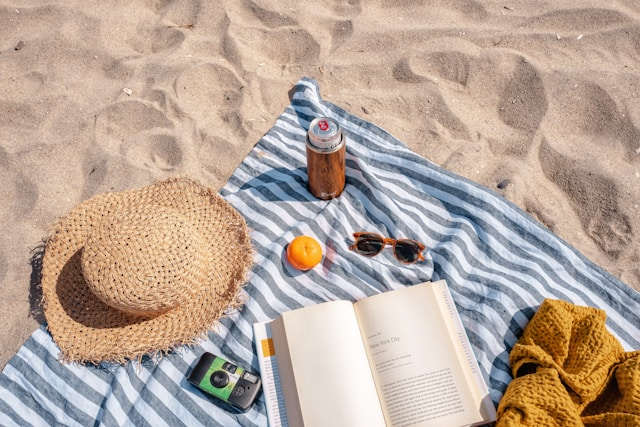

In [6]:
from imageio import imread
from PIL import Image


image = imread('https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640')
im=Image.fromarray(image)
im

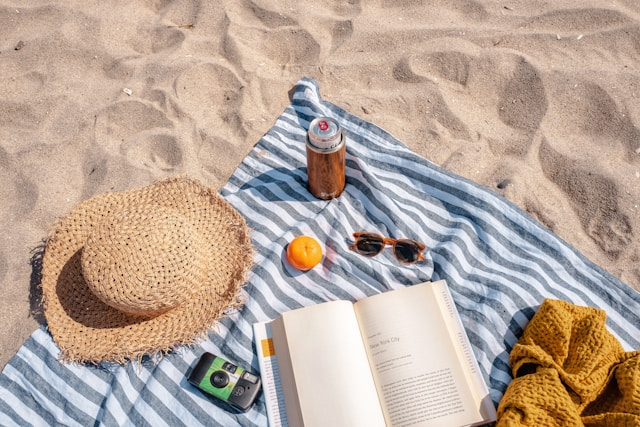

In [ ]:
本地
import shutil
from PIL import Image
import requests

# url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"
# response = requests.get(url, stream=True)
# with open('img.jpg', 'wb') as out_file:
#     shutil.copyfileobj(response.raw, out_file)
# del response
im = Image.open('img2.jpg')
im

In [7]:
# %%
predictions = detector(
    im,
    candidate_labels=["hat", "sunglasses", "book"],
)
predictions


[{'score': 0.25893089175224304,
  'label': 'sunglasses',
  'box': {'xmin': 349, 'ymin': 228, 'xmax': 430, 'ymax': 265}},
 {'score': 0.18501578271389008,
  'label': 'book',
  'box': {'xmin': 270, 'ymin': 284, 'xmax': 502, 'ymax': 427}},
 {'score': 0.1123475655913353,
  'label': 'hat',
  'box': {'xmin': 39, 'ymin': 173, 'xmax': 260, 'ymax': 363}}]

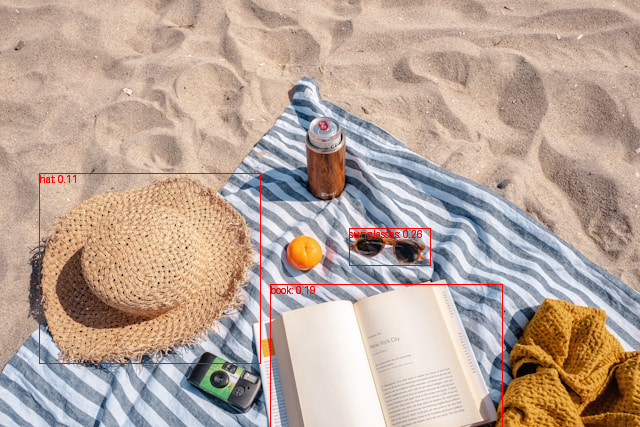

In [9]:
# %%
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="red")

im


 # Pipeline背後的實現

In [ ]:
# %%
from transformers import *
import torch


In [ ]:
# %%
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")


In [ ]:
# %%
input_text = "我覺得不太行！"
inputs = tokenizer(input_text, return_tensors="pt")
inputs


In [ ]:
# %%
res = model(**inputs)
res


In [ ]:
# %%
logits = res.logits
logits = torch.softmax(logits, dim=-1)
logits


In [ ]:
# %%
pred = torch.argmax(logits).item()
pred


In [ ]:
# %%
model.config.id2label


In [ ]:
# %%
result = model.config.id2label.get(pred)
result


In [ ]:
# %%



